# Ramadhan Aditya Ibrahim - 1301200240

In [1]:
# Instalasi Kaggle API untuk download dataset
!pip install kaggle

In [2]:
# Import library yang dibutuhkan
import os
import numpy as np
import zipfile
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix

In [3]:
# Pengaturan API Kaggle (mengganti dengan API key pribadi Anda)
os.environ['KAGGLE_USERNAME'] = 'ramadhanaditya'
os.environ['KAGGLE_KEY'] = '7c9fdf87494aff9a7d6e4ce2ab4f652f'

In [4]:
# Download dataset
!kaggle datasets download -d alerium/splicing-dataset

 58% 5.00M/8.64M [00:00<00:00, 44.0MB/s]
100% 8.64M/8.64M [00:00<00:00, 51.3MB/s]


In [5]:
# Ekstraksi dataset
with zipfile.ZipFile('splicing-dataset.zip', 'r') as zip_ref:
    zip_ref.extractall()

In [6]:
# Direktori dataset
data_dir = "splicing_dataset"
train_dir = os.path.join(data_dir, "splicing_images")

In [7]:
# Pra-pemrosesan data
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    subset='training',
    seed=42
)

valid_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    subset='validation',
    seed=42
)


Found 40 images belonging to 2 classes.
Found 10 images belonging to 2 classes.


In [8]:
# Arsitektur CNN sederhana
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [9]:
# Kompilasi model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Pelatihan model
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=valid_generator
)


Epoch 1/10
2/2 [==============================] - 7s 4s/step - loss: 2.2994 - accuracy: 0.5000 - val_loss: 0.6214 - val_accuracy: 0.5000
Epoch 2/10
2/2 [==============================] - 5s 1s/step - loss: 0.4718 - accuracy: 0.6500 - val_loss: 1.0502 - val_accuracy: 0.5000
Epoch 3/10
2/2 [==============================] - 6s 4s/step - loss: 0.4423 - accuracy: 0.8750 - val_loss: 0.5164 - val_accuracy: 0.5000
Epoch 4/10
2/2 [==============================] - 5s 2s/step - loss: 0.3508 - accuracy: 0.8500 - val_loss: 0.4826 - val_accuracy: 0.6000
Epoch 5/10
2/2 [==============================] - 5s 1s/step - loss: 0.2165 - accuracy: 0.9750 - val_loss: 0.1194 - val_accuracy: 1.0000
Epoch 6/10
2/2 [==============================] - 6s 2s/step - loss: 0.0715 - accuracy: 1.0000 - val_loss: 0.0327 - val_accuracy: 1.0000
Epoch 7/10
2/2 [==============================] - 5s 1s/step - loss: 0.0328 - accuracy: 1.0000 - val_loss: 0.0487 - val_accuracy: 1.0000
Epoch 8/10
2/2 [=========================

In [16]:
# Evaluasi model
print("\nEvaluasi Model:")
model.evaluate(valid_generator)

# Prediksi menggunakan model
predictions = model.predict(valid_generator)
predicted_classes = np.round(predictions)

# Visualisasi hasil gambar
class_labels = list(valid_generator.class_indices.keys())

# Ambil beberapa gambar dari generator
sample_images, sample_labels = next(valid_generator)

# Prediksi kelas gambar
sample_predictions = model.predict(sample_images)
sample_predictions = np.round(sample_predictions)


Evaluasi Model:
1/1 [==============================] - 0s 385ms/step


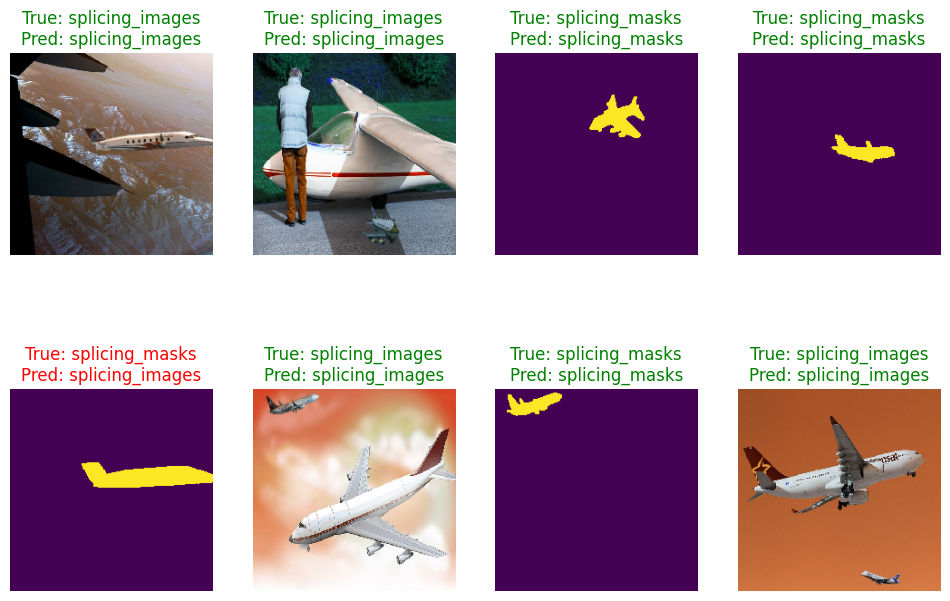

In [17]:
# Visualisasi hasil gambar manipulasi dan non-manipulasi
plt.figure(figsize=(12, 8))
for i in range(8):
    plt.subplot(2, 4, i + 1)
    plt.imshow(sample_images[i])

    true_label = class_labels[int(sample_labels[i])]
    pred_label = class_labels[int(sample_predictions[i])]

    # Tentukan warna teks berdasarkan kebenaran prediksi
    text_color = 'green' if true_label == pred_label else 'red'

    plt.title(f'True: {true_label}\nPred: {pred_label}', color=text_color)
    plt.axis('off')

plt.show()